In [1]:
import nltk
import matplotlib.pyplot as plt
from string import punctuation
from copy import deepcopy

In [2]:
def read_data(filename):
    file = open(filename, 'r')
    words_dict = {}
    words = []
    for line in file:
        ls = line.strip().split()

        for word in ls:
            word = word.lower()
            words.append(word)
            if word in words_dict:
                words_dict[word] += 1
            else:
                words_dict[word] = 1

    return words_dict, words

In [3]:
def read_stopwords(filename):
    file = open(filename, 'r')

    stopwords = list(punctuation)
    for word in file:
        word = word.lower()
        stopwords.append(word.strip())

    return stopwords

In [4]:
def clean_data(stopwords, words=[]):

    temp = []
    for word in words:
        if word not in stopwords:
            temp.append(word)
    return temp

In [5]:
def compare(words_dict={}, words_dict_clean={}):
    words = words_dict.keys()
    print('%-20s|' % ' ', end='')
    for w in words:
        print('%-18s|' % w, end='')

    print()
    print('%-20s|' % 'Original Doc', end='')
    for w in words:
        print('%-18d|' % words_dict[w], end='')

    print()
    print('%-20s|' % 'Cleaned  Doc', end='')
    for w in words:
        print('%-18d|' % words_dict_clean[w], end='')

Total number of words is:  1647


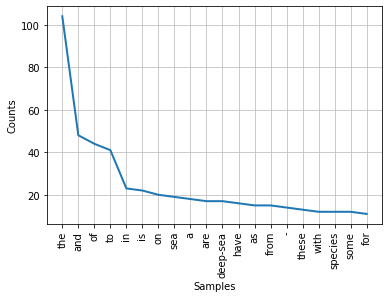

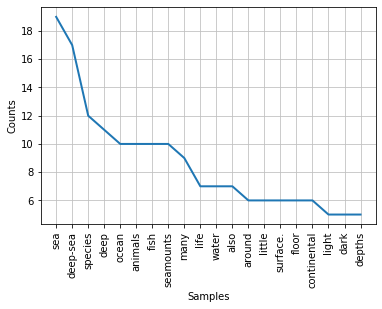

                    |life              |out               |of                |the               |sun               |taking            |action            |for               |ocean             |discover          |work              |wwf               |globally          |to                |protect           |ocean,            |marine            |life锟斤拷and        |communities       |they              |support           |?                 |60%               |our               |planet            |is                |covered           |by                |water             |over              |1,600m            |deep,             |and               |nearly            |half              |world's           |waters            |are               |3,000m            |deep.             |deep              |sea               |starts            |where             |sunlight          |fade,             |around            |200m              |below             |surface           |ocean.            |a         

In [6]:
#setup and quick code
        
if __name__ == "__main__":
    filename = './Text_File.txt'
    stopwords_file = './stopwords.txt'

    words_dict, words = read_data(filename)

    print('Total number of words is: ', len(words))

    nlp_words = nltk.FreqDist(words)
    nlp_words.plot(20)

    words_dict = dict(nlp_words.items())

    stopwords = read_stopwords(stopwords_file)
    words_clean = clean_data(stopwords, words)

    words_dict_clean = deepcopy(words_dict)
    for k, v in words_dict_clean.items():
        words_dict_clean[k] = 0

    nlp_words_clean = nltk.FreqDist(words_clean)
    nlp_words_clean.plot(20)

    for k, v in nlp_words_clean.items():
        words_dict_clean[k] += v

    compare(words_dict, words_dict_clean)